# Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Initialize The Data Source

In [3]:
from google.colab import drive
 
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g51_v1tNmAAGSBP5-ixeChy56Xvn35VurX8wEJw36TP3baNRmoQ5-c
Mounted at /content/drive


# Read Dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/train_ver2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Filtering

In [5]:
data = data[(data['fecha_dato'] == '2015-06-28') | (data['fecha_dato'] == '2016-06-28')]

In [6]:
data.shape

(632110, 48)

In [7]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144384,2015-06-28,16132,N,ES,V,48,1995-03-08,0.0,244,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144385,2015-06-28,1063040,N,ES,V,25,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
3144386,2015-06-28,1063041,N,ES,H,24,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144387,2015-06-28,1063042,N,ES,H,26,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144388,2015-06-28,1063043,N,ES,V,23,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,36.0,PONTEVEDRA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   fecha_alta             630249 non-null  object 
 7   ind_nuevo              630249 non-null  float64
 8   antiguedad             632110 non-null  object 
 9   indrel                 630249 non-null  float64
 10  ult_fec_cli_1t         782 non-null     object 
 11  indrel_1mes            630249 non-null  object 
 12  tiprel_1mes            630249 non-null  object 
 13  indresi                630249 non-null  object 
 14  indext                 630249

In [9]:
data.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

# Data Backup

In [10]:
df = pd.DataFrame(data=data, columns=data.columns, index=data.index)

In [11]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144384,2015-06-28,16132,N,ES,V,48,1995-03-08,0.0,244,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144385,2015-06-28,1063040,N,ES,V,25,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
3144386,2015-06-28,1063041,N,ES,H,24,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144387,2015-06-28,1063042,N,ES,H,26,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144388,2015-06-28,1063043,N,ES,V,23,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,36.0,PONTEVEDRA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


# Remove NAN Values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   fecha_alta             630249 non-null  object 
 7   ind_nuevo              630249 non-null  float64
 8   antiguedad             632110 non-null  object 
 9   indrel                 630249 non-null  float64
 10  ult_fec_cli_1t         782 non-null     object 
 11  indrel_1mes            630249 non-null  object 
 12  tiprel_1mes            630249 non-null  object 
 13  indresi                630249 non-null  object 
 14  indext                 630249

In [13]:
df.drop(['conyuemp', 'ult_fec_cli_1t', 'fecha_alta'], inplace=True, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   ind_nuevo              630249 non-null  float64
 7   antiguedad             632110 non-null  object 
 8   indrel                 630249 non-null  float64
 9   indrel_1mes            630249 non-null  object 
 10  tiprel_1mes            630249 non-null  object 
 11  indresi                630249 non-null  object 
 12  indext                 630249 non-null  object 
 13  canal_entrada          630228 non-null  object 
 14  indfall                630249

In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             523650 non-null  object 
 1   ncodpers               523650 non-null  int64  
 2   ind_empleado           523650 non-null  object 
 3   pais_residencia        523650 non-null  object 
 4   sexo                   523650 non-null  object 
 5   age                    523650 non-null  object 
 6   ind_nuevo              523650 non-null  float64
 7   antiguedad             523650 non-null  object 
 8   indrel                 523650 non-null  float64
 9   indrel_1mes            523650 non-null  object 
 10  tiprel_1mes            523650 non-null  object 
 11  indresi                523650 non-null  object 
 12  indext                 523650 non-null  object 
 13  canal_entrada          523650 non-null  object 
 14  indfall                523650

# Data Analysing And Cleaning

In [17]:
initial_products_label = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

In [18]:
products_df = df.loc[:, initial_products_label]

In [19]:
products_df[products_df['ind_nomina_ult1'] == 1]

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144540,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3144542,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1
3144543,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1.0,1.0,1
3144545,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3144579,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776395,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0,1.0,1
3776412,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1
3776484,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3776486,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1.0,1.0,1


In [20]:
products_df.drop(['ind_nomina_ult1', 'ind_nom_pens_ult1'], inplace=True, axis=1)

In [21]:
products_df

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_recibo_ult1
3144384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3144386,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144387,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144389,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776489,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776490,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776491,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
products_label = products_df.columns

In [23]:
products = [i for i in range(len(products_label))]

In [24]:
products_dict = dict()

for i in range(len(products)):
  products_dict[products_label[i]] = products[i]

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   ind_ahor_fin_ult1  523650 non-null  int64
 1   ind_aval_fin_ult1  523650 non-null  int64
 2   ind_cco_fin_ult1   523650 non-null  int64
 3   ind_cder_fin_ult1  523650 non-null  int64
 4   ind_cno_fin_ult1   523650 non-null  int64
 5   ind_ctju_fin_ult1  523650 non-null  int64
 6   ind_ctma_fin_ult1  523650 non-null  int64
 7   ind_ctop_fin_ult1  523650 non-null  int64
 8   ind_ctpp_fin_ult1  523650 non-null  int64
 9   ind_deco_fin_ult1  523650 non-null  int64
 10  ind_deme_fin_ult1  523650 non-null  int64
 11  ind_dela_fin_ult1  523650 non-null  int64
 12  ind_ecue_fin_ult1  523650 non-null  int64
 13  ind_fond_fin_ult1  523650 non-null  int64
 14  ind_hip_fin_ult1   523650 non-null  int64
 15  ind_plan_fin_ult1  523650 non-null  int64
 16  ind_pres_fin_ult1  523650 non-n

In [26]:
products_df.describe()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_recibo_ult1
count,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.00000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000
mean,0.000141,0.000038,0.778942,0.000512,0.100311,0.012772,0.01116,0.169573,0.058109,0.002727,0.002324,0.058302,0.106279,0.024612,0.007956,0.012367,0.003210,0.069550,0.060773,0.031937,0.005307,0.164050
std,0.011887,0.006180,0.414960,0.022617,0.300415,0.112289,0.10505,0.375258,0.233950,0.052150,0.048153,0.234314,0.308195,0.154939,0.088839,0.110518,0.056567,0.254388,0.238914,0.175834,0.072656,0.370322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
for i in range(1, len(products_label)):
  products_df[products_label[i]] = products_df[products_label[i]].replace(1, products_dict[products_label[i]])

In [28]:
products_df['target'] = products_df.max(axis=1)

In [29]:
np.unique(products_df['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [30]:
len(np.unique(products_df['target']))

22

In [31]:
len(products_label)

22

# Remove Targets

In [32]:
x_df = pd.DataFrame(data=df, columns=df.columns, index=df.index)

In [33]:
x_df.drop(initial_products_label, inplace=True, axis=1)

In [34]:
x_df['target'] = products_df['target']

# Data PreProcessing

In [35]:
x_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,target
3144384,2015-06-28,16132,N,ES,V,48,0.0,244,1.0,1,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,2
3144385,2015-06-28,1063040,N,ES,V,25,0.0,34,1.0,1,A,S,N,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,21
3144386,2015-06-28,1063041,N,ES,H,24,0.0,34,1.0,1,A,S,N,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,2
3144387,2015-06-28,1063042,N,ES,H,26,0.0,34,1.0,1,I,S,N,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,2
3144389,2015-06-28,1063044,N,ES,H,23,0.0,34,1.0,1,I,S,N,KHE,N,1.0,15.0,"CORUÑA, A",1.0,95281.08,03 - UNIVERSITARIO,2


In [36]:
x_df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,target
count,5.236500e+05,523650.000000,523650.000000,523650.0,523650.000000,523650.000000,5.236500e+05,523650.000000
mean,7.812755e+05,0.021354,1.000749,1.0,26.596492,0.559628,1.342810e+05,7.626546
std,4.124386e+05,0.144561,0.270853,0.0,12.392188,0.496432,2.282979e+05,7.443261
min,1.588900e+04,0.000000,1.000000,1.0,2.000000,0.000000,1.202730e+03,0.000000
25%,4.113462e+05,0.000000,1.000000,1.0,16.000000,0.000000,6.905563e+04,2.000000
50%,8.805755e+05,0.000000,1.000000,1.0,28.000000,1.000000,1.023512e+05,2.000000
75%,1.143284e+06,0.000000,1.000000,1.0,33.000000,1.000000,1.565579e+05,12.000000
max,1.403935e+06,1.000000,99.000000,1.0,52.000000,1.000000,2.889440e+07,21.000000


In [37]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             523650 non-null  object 
 1   ncodpers               523650 non-null  int64  
 2   ind_empleado           523650 non-null  object 
 3   pais_residencia        523650 non-null  object 
 4   sexo                   523650 non-null  object 
 5   age                    523650 non-null  object 
 6   ind_nuevo              523650 non-null  float64
 7   antiguedad             523650 non-null  object 
 8   indrel                 523650 non-null  float64
 9   indrel_1mes            523650 non-null  object 
 10  tiprel_1mes            523650 non-null  object 
 11  indresi                523650 non-null  object 
 12  indext                 523650 non-null  object 
 13  canal_entrada          523650 non-null  object 
 14  indfall                523650

In [38]:
x_df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
target                   False
dtype: bool

In [39]:
x_df['fecha_dato'] = pd.to_datetime(x_df["fecha_dato"])

In [40]:
x_df.dtypes

fecha_dato               datetime64[ns]
ncodpers                          int64
ind_empleado                     object
pais_residencia                  object
sexo                             object
age                              object
ind_nuevo                       float64
antiguedad                       object
indrel                          float64
indrel_1mes                      object
tiprel_1mes                      object
indresi                          object
indext                           object
canal_entrada                    object
indfall                          object
tipodom                         float64
cod_prov                        float64
nomprov                          object
ind_actividad_cliente           float64
renta                           float64
segmento                         object
target                            int64
dtype: object

In [41]:
x_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,target
3144384,2015-06-28,16132,N,ES,V,48,0.0,244,1.0,1,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,2
3144385,2015-06-28,1063040,N,ES,V,25,0.0,34,1.0,1,A,S,N,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,21
3144386,2015-06-28,1063041,N,ES,H,24,0.0,34,1.0,1,A,S,N,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,2
3144387,2015-06-28,1063042,N,ES,H,26,0.0,34,1.0,1,I,S,N,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,2
3144389,2015-06-28,1063044,N,ES,H,23,0.0,34,1.0,1,I,S,N,KHE,N,1.0,15.0,"CORUÑA, A",1.0,95281.08,03 - UNIVERSITARIO,2


In [42]:
x_df['age'].unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [43]:
x_df['age'].astype(str).unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [44]:
x_df['age'].astype(str).unique().astype(int)

array([ 48,  25,  24,  26,  23,  22,  29,  36,  30,  32,  28,  40,  34,
        63,  53,  27,  39,  60,  42,  31,  41,  45,  37,  35,  57,  58,
        46,  44,  50,  47,  75,  38,  49,  43,  52,   5,  18,  13,  11,
        59,  33,  70,  69,  51,  82,  68,  54,  61,  12,  67,  14,  71,
        55,  77,  65,  92,   6,  10,   7,  84,  73,  62,  17,  87,  15,
        72,  56,  21,  66,  85,  83,   8,  86,   9,  16,  19,  79,  64,
        74,  95,  80,  96,  81,  20,  90,  78,  88, 100,  76,  91,  94,
        93,  89,  98,   4,  97, 104, 106, 101, 103,  99,   3,   2, 102,
       107, 109, 105, 110, 112, 108, 116, 115, 111, 113])

In [45]:
len(x_df['age'].astype(str).unique())

114

In [46]:
len(x_df['age'].astype(str).unique().astype(int))

114

In [47]:
age_df = x_df.loc[:, 'age']

In [48]:
age_df.head()

3144384     48
3144385     25
3144386     24
3144387     26
3144389     23
Name: age, dtype: object

In [49]:
age_df.unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [50]:
age_df = age_df.astype(str)

In [51]:
age_df.unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [52]:
len(age_df)

523650

In [53]:
len(age_df.str.replace(" ", ""))

523650

In [54]:
age_df = age_df.str.replace(" ", "")

In [55]:
age_df = age_df.astype(int)

In [56]:
age_df.unique()

array([ 48,  25,  24,  26,  23,  22,  29,  36,  30,  32,  28,  40,  34,
        63,  53,  27,  39,  60,  42,  31,  41,  45,  37,  35,  57,  58,
        46,  44,  50,  47,  75,  38,  49,  43,  52,   5,  18,  13,  11,
        59,  33,  70,  69,  51,  82,  68,  54,  61,  12,  67,  14,  71,
        55,  77,  65,  92,   6,  10,   7,  84,  73,  62,  17,  87,  15,
        72,  56,  21,  66,  85,  83,   8,  86,   9,  16,  19,  79,  64,
        74,  95,  80,  96,  81,  20,  90,  78,  88, 100,  76,  91,  94,
        93,  89,  98,   4,  97, 104, 106, 101, 103,  99,   3,   2, 102,
       107, 109, 105, 110, 112, 108, 116, 115, 111, 113])

In [57]:
age_df.dtype

dtype('int64')

In [58]:
len(x_df['age'])

523650

In [59]:
len(age_df)

523650

In [60]:
x_df['age'] = age_df

In [61]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_dato             523650 non-null  datetime64[ns]
 1   ncodpers               523650 non-null  int64         
 2   ind_empleado           523650 non-null  object        
 3   pais_residencia        523650 non-null  object        
 4   sexo                   523650 non-null  object        
 5   age                    523650 non-null  int64         
 6   ind_nuevo              523650 non-null  float64       
 7   antiguedad             523650 non-null  object        
 8   indrel                 523650 non-null  float64       
 9   indrel_1mes            523650 non-null  object        
 10  tiprel_1mes            523650 non-null  object        
 11  indresi                523650 non-null  object        
 12  indext                 523650 non-nul

In [62]:
new_columns = ['transactional_date', 'customer_code', 'employee_index', 'country_of_residence', 'gender', 'age',
                'new_customer_index', 'seniority', 'customer_type', 'cust_type_at_beg', 'cust_relation_at_beg', 'residency_index', 'foreign_index',
                'channel_used', 'decreased_index', 'address_type', 'province_code', 'province_name', 'activity_index', 'gross_income', 'segmentation', 'target'
                ]

len(new_columns)

22

In [63]:
# beg -> beginnning
# cust -> customer

x_df.columns = new_columns

In [64]:
x_df.describe()

,customer_code,age,new_customer_index,customer_type,address_type,province_code,activity_index,gross_income,target
count,5.236500e+05,523650.000000,523650.000000,523650.000000,523650.0,523650.000000,523650.000000,5.236500e+05,523650.000000
mean,7.812755e+05,40.638831,0.021354,1.000749,1.0,26.596492,0.559628,1.342810e+05,7.626546
std,4.124386e+05,17.028314,0.144561,0.270853,0.0,12.392188,0.496432,2.282979e+05,7.443261
min,1.588900e+04,2.000000,0.000000,1.000000,1.0,2.000000,0.000000,1.202730e+03,0.000000
25%,4.113462e+05,25.000000,0.000000,1.000000,1.0,16.000000,0.000000,6.905563e+04,2.000000
50%,8.805755e+05,40.000000,0.000000,1.000000,1.0,28.000000,1.000000,1.023512e+05,2.000000
75%,1.143284e+06,51.000000,0.000000,1.000000,1.0,33.000000,1.000000,1.565579e+05,12.000000
max,1.403935e+06,116.000000,1.000000,99.000000,1.0,52.000000,1.000000,2.889440e+07,21.000000


In [65]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  object        
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  float64       
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  float64       
 9   cust_type_at_beg      523650 non-null  object        
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [66]:
x_df['employee_index'].unique()

array(['N', 'A', 'F', 'B', 'S'], dtype=object)

In [67]:
labelEncoder = LabelEncoder()

In [68]:
labelEncoder.fit_transform(x_df['employee_index'])

array([3, 3, 3, ..., 3, 3, 3])

In [69]:
np.unique(labelEncoder.fit_transform(x_df['employee_index']))

array([0, 1, 2, 3, 4])

In [70]:
x_df['employee_index'] = labelEncoder.fit_transform(x_df['employee_index'])

In [71]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  float64       
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  float64       
 9   cust_type_at_beg      523650 non-null  object        
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [72]:
x_df['country_of_residence'].unique()

array(['ES', 'IT', 'DE', 'BO'], dtype=object)

In [73]:
x_df['new_customer_index'].unique()

array([0., 1.])

In [74]:
x_df['new_customer_index'] = x_df['new_customer_index'].astype(int)

In [75]:
x_df['new_customer_index'].unique()

array([0, 1])

In [76]:
x_df['customer_type'].unique()

array([ 1., 99.])

In [77]:
x_df['customer_type'] = x_df['customer_type'].astype(int)

In [78]:
x_df['customer_type'].unique()

array([ 1, 99])

In [79]:
x_df['cust_type_at_beg'].unique()

array([1.0], dtype=object)

In [80]:
x_df['cust_type_at_beg'] = x_df['cust_type_at_beg'].astype(float)

In [81]:
x_df['cust_type_at_beg'] = x_df['cust_type_at_beg'].apply(int)

In [82]:
x_df['cust_type_at_beg'].unique()

array([1])

In [83]:
x_df['cust_relation_at_beg'].unique()

array(['A', 'I'], dtype=object)

In [84]:
x_df['residency_index'].unique()

array(['S', 'N'], dtype=object)

In [85]:
x_df['foreign_index'].unique()

array(['N', 'S'], dtype=object)

In [86]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [87]:
x_df['channel_used'].unique()

array(['KAT', 'KHE', 'KHD', 'KFC', 'KFA', 'KHC', 'KAZ', 'KHK', 'KHL',
       'RED', 'KHN', 'KEH', 'KGC', 'KHM', 'KHO', 'KDH', 'KHF', 'KFK',
       'KHA', 'KAF', 'K00', '013', 'KAR', 'KFJ', 'KAG', 'KAA', 'KCC',
       'KFG', 'KFD', 'KGX', 'KAH', 'KAE', 'KFS', 'KFP', 'KAB', 'KFN',
       'KAP', 'KFU', 'KGY', 'KAQ', 'KAI', 'KFF', 'KGV', 'KAJ', 'KAD',
       'KBG', 'KHQ', 'KAK', '007', 'KCA', 'KDT', 'KBO', 'KBQ', 'KAY',
       'KCG', 'KBU', 'KBZ', '004', 'KDR', 'KEC', 'KEU', 'KCK', 'KDE',
       'KDO', 'KCH', 'KCI', 'KCL', 'KDA', 'KAC', 'KES', 'KAS', 'KCM',
       'KCN', 'KDQ', 'KCB', 'KDU', 'KAL', 'KAW', 'KEY', 'KCS', 'KCD',
       'KCE', 'KEJ', 'KBL', 'KAO', 'KDC', 'KEA', 'KDY', 'KEW', 'KFT',
       'KBH', 'KEV', 'KEG', 'KDZ', 'KEI', 'KEO', 'KBD', 'KDP', 'KBV',
       'KCO', 'KBR', 'KCV', 'KBF', 'KCU', 'KBX', 'KDD', 'KBW', 'KCF',
       'KDX', 'KAN', 'KAM', 'KDS', 'KBY', 'KEF', 'KBS', 'KDF', 'KCP',
       'KDB', 'KBP', 'KBE', 'KCX', 'KDV', 'KDG', 'KEB', 'KEL', 'KEZ',
       'KBB', 'KBJ',

In [88]:
x_df['decreased_index'].unique()

array(['N', 'S'], dtype=object)

In [89]:
x_df['address_type'].unique()

array([1.])

In [90]:
x_df.drop(['address_type'], inplace=True, axis=1)

In [91]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [92]:
x_df['province_code'].unique()

array([28., 46., 23., 11., 15., 33., 36., 29., 41.,  2., 14., 50., 27.,
        6.,  7., 45., 24.,  3., 21., 30., 18., 25., 32.,  5., 37., 44.,
       12.,  8., 39., 10., 43., 34., 35.,  9., 13., 22., 19., 26., 42.,
        4., 17., 16., 49., 47., 51., 52., 40., 38., 31., 48., 20.])

In [93]:
x_df['province_code'] = x_df['province_code'].apply(int)

In [94]:
x_df['province_name'].unique()

array(['MADRID', 'VALENCIA', 'JAEN', 'CADIZ', 'CORUÑA, A', 'ASTURIAS',
       'PONTEVEDRA', 'MALAGA', 'SEVILLA', 'ALBACETE', 'CORDOBA',
       'ZARAGOZA', 'LUGO', 'BADAJOZ', 'BALEARS, ILLES', 'TOLEDO', 'LEON',
       'ALICANTE', 'HUELVA', 'MURCIA', 'GRANADA', 'LERIDA', 'OURENSE',
       'AVILA', 'SALAMANCA', 'TERUEL', 'CASTELLON', 'BARCELONA',
       'CANTABRIA', 'CACERES', 'TARRAGONA', 'PALENCIA', 'PALMAS, LAS',
       'BURGOS', 'CIUDAD REAL', 'HUESCA', 'GUADALAJARA', 'RIOJA, LA',
       'SORIA', 'ALMERIA', 'GIRONA', 'CUENCA', 'ZAMORA', 'VALLADOLID',
       'CEUTA', 'MELILLA', 'SEGOVIA', 'SANTA CRUZ DE TENERIFE', 'NAVARRA',
       'BIZKAIA', 'GIPUZKOA'], dtype=object)

In [95]:
x_df['activity_index'].unique()

array([0., 1.])

In [96]:
x_df['activity_index'] = x_df['activity_index'].apply(int)

In [97]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [98]:
len(x_df['gross_income'].unique())

401537

In [99]:
len(x_df['segmentation'].unique())

3

In [100]:
x_df['segmentation'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP'],
      dtype=object)

In [101]:
x_df['country_of_residence'] = labelEncoder.fit_transform(x_df['country_of_residence'])
x_df['gender'] = labelEncoder.fit_transform(x_df['gender'])
x_df['cust_relation_at_beg'] = labelEncoder.fit_transform(x_df['cust_relation_at_beg'])
x_df['residency_index'] = labelEncoder.fit_transform(x_df['residency_index'])
x_df['foreign_index'] = labelEncoder.fit_transform(x_df['foreign_index'])
x_df['products'] = x_df['target']
x_df['decreased_index'] = labelEncoder.fit_transform(x_df['decreased_index'])
x_df['segmentation'] = labelEncoder.fit_transform(x_df['segmentation'])
x_df['province_name'] = labelEncoder.fit_transform(x_df['province_name'])

In [102]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  int64         
 4   gender                523650 non-null  int64         
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  int64         
 11  residency_index       523650 non-null  int64         
 12  foreign_index         523650 non-null  int64       

In [103]:
x_df['transactional_date'] = labelEncoder.fit_transform(x_df['transactional_date'])

In [104]:
x_df['channel_used'] = labelEncoder.fit_transform(x_df['channel_used'])

In [105]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transactional_date    523650 non-null  int64  
 1   customer_code         523650 non-null  int64  
 2   employee_index        523650 non-null  int64  
 3   country_of_residence  523650 non-null  int64  
 4   gender                523650 non-null  int64  
 5   age                   523650 non-null  int64  
 6   new_customer_index    523650 non-null  int64  
 7   seniority             523650 non-null  object 
 8   customer_type         523650 non-null  int64  
 9   cust_type_at_beg      523650 non-null  int64  
 10  cust_relation_at_beg  523650 non-null  int64  
 11  residency_index       523650 non-null  int64  
 12  foreign_index         523650 non-null  int64  
 13  channel_used          523650 non-null  int64  
 14  decreased_index       523650 non-null  int64 

In [106]:
x_df['seniority'].unique()

array(['    244', '     34', '     25', '     33', '     22', '     10',
       '     21', '     17', '     12', '     20', '     30', '      2',
       '      5', '     24', '     18', '      6', '     27', '      8',
       '     13', '     32', '     11', '     28', '     35', '     16',
       '     23', '      3', '     26', '     31', '      9', '      1',
       '      4', '     29', '    157', '      7', '     14', '     15',
       '     36', '     40', '     19', '    139', '     46', '     38',
       '     44', '     41', '     45', '     39', '     47', '     42',
       '     43', '     37', '     49', '     50', '     48', '     51',
       '     56', '     54', '     55', '     53', '     52', '     57',
       '     58', '    209', '    165', '    164', '    105', '     81',
       '    129', '    109', '    128', '    156', '    121', '    150',
       '    142', '     64', '    122', '    125', '    146', '    101',
       '     69', '    163', '    116', '    117', 

In [107]:
x_df[x_df['seniority'] == -999999]

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target,products


In [108]:
x_df[x_df['seniority'] == '-999999']

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target,products
3601557,0,138388,3,2,1,51,0,-999999,1,1,0,1,0,0,0,28,29,1,198122.16,0,21,21
3613493,0,162278,3,2,1,66,0,-999999,1,1,0,1,0,0,0,28,29,0,173862.36,1,0,0


In [109]:
x_df['seniority'] = x_df['seniority'].apply(str)

In [110]:
x_df['seniority'].unique()

array(['    244', '     34', '     25', '     33', '     22', '     10',
       '     21', '     17', '     12', '     20', '     30', '      2',
       '      5', '     24', '     18', '      6', '     27', '      8',
       '     13', '     32', '     11', '     28', '     35', '     16',
       '     23', '      3', '     26', '     31', '      9', '      1',
       '      4', '     29', '    157', '      7', '     14', '     15',
       '     36', '     40', '     19', '    139', '     46', '     38',
       '     44', '     41', '     45', '     39', '     47', '     42',
       '     43', '     37', '     49', '     50', '     48', '     51',
       '     56', '     54', '     55', '     53', '     52', '     57',
       '     58', '    209', '    165', '    164', '    105', '     81',
       '    129', '    109', '    128', '    156', '    121', '    150',
       '    142', '     64', '    122', '    125', '    146', '    101',
       '     69', '    163', '    116', '    117', 

In [111]:
x_df['seniority'] = x_df['seniority'].str.replace(" ", "")

In [112]:
x_df['seniority'].unique()

array(['244', '34', '25', '33', '22', '10', '21', '17', '12', '20', '30',
       '2', '5', '24', '18', '6', '27', '8', '13', '32', '11', '28', '35',
       '16', '23', '3', '26', '31', '9', '1', '4', '29', '157', '7', '14',
       '15', '36', '40', '19', '139', '46', '38', '44', '41', '45', '39',
       '47', '42', '43', '37', '49', '50', '48', '51', '56', '54', '55',
       '53', '52', '57', '58', '209', '165', '164', '105', '81', '129',
       '109', '128', '156', '121', '150', '142', '64', '122', '125',
       '146', '101', '69', '163', '116', '117', '107', '137', '108',
       '145', '61', '162', '160', '102', '88', '65', '136', '114', '113',
       '161', '217', '77', '154', '126', '159', '166', '104', '119', '94',
       '149', '103', '82', '76', '151', '70', '86', '79', '138', '135',
       '169', '60', '134', '120', '110', '148', '78', '141', '66', '140',
       '99', '147', '95', '118', '133', '124', '127', '193', '80', '132',
       '83', '123', '231', '143', '187', '111', '8

In [113]:
x_df['seniority'] = x_df['seniority'].apply(int)

In [114]:
x_df['seniority'].unique()

array([    244,      34,      25,      33,      22,      10,      21,
            17,      12,      20,      30,       2,       5,      24,
            18,       6,      27,       8,      13,      32,      11,
            28,      35,      16,      23,       3,      26,      31,
             9,       1,       4,      29,     157,       7,      14,
            15,      36,      40,      19,     139,      46,      38,
            44,      41,      45,      39,      47,      42,      43,
            37,      49,      50,      48,      51,      56,      54,
            55,      53,      52,      57,      58,     209,     165,
           164,     105,      81,     129,     109,     128,     156,
           121,     150,     142,      64,     122,     125,     146,
           101,      69,     163,     116,     117,     107,     137,
           108,     145,      61,     162,     160,     102,      88,
            65,     136,     114,     113,     161,     217,      77,
           154,     

In [115]:
x_df['seniority'].mean()

78.99196600782966

In [116]:
int(x_df['seniority'].mean())

78

In [117]:
x_df[x_df['seniority'] == -999999]

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target,products
3601557,0,138388,3,2,1,51,0,-999999,1,1,0,1,0,0,0,28,29,1,198122.16,0,21,21
3613493,0,162278,3,2,1,66,0,-999999,1,1,0,1,0,0,0,28,29,0,173862.36,1,0,0


In [118]:
seniority_df = x_df.loc[:, 'seniority']

In [119]:
seniority_df.head()

3144384    244
3144385     34
3144386     34
3144387     34
3144389     34
Name: seniority, dtype: int64

In [120]:
len(seniority_df.unique())

247

In [121]:
seniority_df[seniority_df == -999999]

3601557   -999999
3613493   -999999
Name: seniority, dtype: int64

In [122]:
int(seniority_df.mean())

78

In [123]:
seniority_df[seniority_df == -999999] = int(seniority_df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
len(seniority_df.unique())

246

In [125]:
x_df['seniority'].unique()

array([244,  34,  25,  33,  22,  10,  21,  17,  12,  20,  30,   2,   5,
        24,  18,   6,  27,   8,  13,  32,  11,  28,  35,  16,  23,   3,
        26,  31,   9,   1,   4,  29, 157,   7,  14,  15,  36,  40,  19,
       139,  46,  38,  44,  41,  45,  39,  47,  42,  43,  37,  49,  50,
        48,  51,  56,  54,  55,  53,  52,  57,  58, 209, 165, 164, 105,
        81, 129, 109, 128, 156, 121, 150, 142,  64, 122, 125, 146, 101,
        69, 163, 116, 117, 107, 137, 108, 145,  61, 162, 160, 102,  88,
        65, 136, 114, 113, 161, 217,  77, 154, 126, 159, 166, 104, 119,
        94, 149, 103,  82,  76, 151,  70,  86,  79, 138, 135, 169,  60,
       134, 120, 110, 148,  78, 141,  66, 140,  99, 147,  95, 118, 133,
       124, 127, 193,  80, 132,  83, 123, 231, 143, 187, 111,  85,  98,
       170, 106,  84,  63, 155, 189, 175,  87, 177, 115, 112, 232,  97,
       152, 144,  93, 203, 131, 172, 158, 100,  72, 176, 153,  89,  96,
       174, 194,  71, 173, 212,  68,  59,  74, 130,  73, 183, 18

In [126]:
x_df['target'] = x_df['target'].astype(int)

In [127]:
x_df['target'].unique()

array([ 2, 21, 12, 17,  0, 11,  5,  4, 13, 18, 19,  6, 15, 16,  9,  3, 10,
       20,  7,  8, 14,  1])

In [128]:
len(x_df[x_df['target'] == 0])

12693

In [129]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transactional_date    523650 non-null  int64  
 1   customer_code         523650 non-null  int64  
 2   employee_index        523650 non-null  int64  
 3   country_of_residence  523650 non-null  int64  
 4   gender                523650 non-null  int64  
 5   age                   523650 non-null  int64  
 6   new_customer_index    523650 non-null  int64  
 7   seniority             523650 non-null  int64  
 8   customer_type         523650 non-null  int64  
 9   cust_type_at_beg      523650 non-null  int64  
 10  cust_relation_at_beg  523650 non-null  int64  
 11  residency_index       523650 non-null  int64  
 12  foreign_index         523650 non-null  int64  
 13  channel_used          523650 non-null  int64  
 14  decreased_index       523650 non-null  int64 

In [130]:
del age_df
del seniority_df

In [131]:
x_df['age'][(x_df['age'] >= 0) & (x_df['age'] <= 10)] = 0
x_df['age'][(x_df['age'] >= 11) & (x_df['age'] <= 20)] = 1
x_df['age'][(x_df['age'] >= 21) & (x_df['age'] <= 30)] = 2
x_df['age'][(x_df['age'] >= 31) & (x_df['age'] <= 40)] = 3
x_df['age'][(x_df['age'] >= 41) & (x_df['age'] <= 50)] = 4
x_df['age'][(x_df['age'] >= 51) & (x_df['age'] <= 60)] = 5
x_df['age'][(x_df['age'] >= 61) & (x_df['age'] <= 70)] = 6
x_df['age'][(x_df['age'] >= 71) & (x_df['age'] <= 80)] = 7
x_df['age'][(x_df['age'] >= 81) & (x_df['age'] <= 90)] = 8
x_df['age'][(x_df['age'] >= 91) & (x_df['age'] <= 100)] = 9
x_df['age'][(x_df['age'] >= 101) & (x_df['age'] <= 200)] = 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [132]:
x_df['age'].unique()

array([ 4,  2,  3,  6,  5,  7,  0,  1,  8,  9, 10])

In [133]:
x_df['seniority'][(x_df['seniority'] >= 0) & (x_df['seniority'] <= 20)] = 0
x_df['seniority'][(x_df['seniority'] >= 21) & (x_df['seniority'] <= 40)] = 1
x_df['seniority'][(x_df['seniority'] >= 41) & (x_df['seniority'] <= 60)] = 3
x_df['seniority'][(x_df['seniority'] >= 61) & (x_df['seniority'] <= 80)] = 4
x_df['seniority'][(x_df['seniority'] >= 81) & (x_df['seniority'] <= 100)] = 5
x_df['seniority'][(x_df['seniority'] >= 101) & (x_df['seniority'] <= 120)] = 6
x_df['seniority'][(x_df['seniority'] >= 121) & (x_df['seniority'] <= 140)] = 7
x_df['seniority'][(x_df['seniority'] >= 141) & (x_df['seniority'] <= 160)] = 8
x_df['seniority'][(x_df['seniority'] >= 161) & (x_df['seniority'] <= 180)] = 9
x_df['seniority'][(x_df['seniority'] >= 181) & (x_df['seniority'] <= 200)] = 10
x_df['seniority'][(x_df['seniority'] >= 201) & (x_df['seniority'] <= 220)] = 11
x_df['seniority'][(x_df['seniority'] >= 221) & (x_df['seniority'] <= 240)] = 12
x_df['seniority'][(x_df['seniority'] >= 241) & (x_df['seniority'] <= 260)] = 13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [134]:
x_df['seniority'].unique()

array([13,  1,  0,  8,  7,  3, 11,  9,  6,  5,  4, 10, 12])

In [135]:
x_df['gross_income'].max()

28894395.51

In [136]:
x_df['gross_income'][(x_df['gross_income'] >= 0) & (x_df['gross_income'] <= 19999)] = 0
x_df['gross_income'][(x_df['gross_income'] >= 20000) & (x_df['gross_income'] <= 39999)] = 1
x_df['gross_income'][(x_df['gross_income'] >= 40000) & (x_df['gross_income'] <= 59999)] = 2
x_df['gross_income'][(x_df['gross_income'] >= 60000) & (x_df['gross_income'] <= 79999)] = 3
x_df['gross_income'][(x_df['gross_income'] >= 80000) & (x_df['gross_income'] <= 99999)] = 4
x_df['gross_income'][(x_df['gross_income'] >= 100000) & (x_df['gross_income'] <= 119999)] = 5
x_df['gross_income'][(x_df['gross_income'] >= 120000) & (x_df['gross_income'] <= 139999)] = 6
x_df['gross_income'][x_df['gross_income'] >= 140000] = 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [137]:
x_df['gross_income'].unique()

array([7.0000000e+00, 3.0000000e+00, 1.0000000e+00, 4.0000000e+00,
       5.0000000e+00, 2.0000000e+00, 6.0000000e+00, 0.0000000e+00,
       3.9999240e+04, 5.9999190e+04, 7.9999440e+04, 3.9999660e+04,
       9.9999210e+04, 9.9999780e+04, 1.1999934e+05, 3.9999060e+04,
       5.9999220e+04, 7.9999200e+04, 5.9999460e+04, 7.9999830e+04,
       7.9999680e+04, 5.9999820e+04, 1.1999991e+05, 7.9999230e+04])

In [138]:
x_df['gross_income'] = x_df['gross_income'].apply(int)

In [139]:
x_df['gross_income'].unique()

array([     7,      3,      1,      4,      5,      2,      6,      0,
        39999,  59999,  79999,  99999, 119999])

In [140]:
x_df['gross_income'][x_df['gross_income'] == 39999]

3151481    39999
3198775    39999
3271384    39999
Name: gross_income, dtype: int64

In [141]:
x_df['gross_income'][x_df['gross_income'] == 39999] = 1
x_df['gross_income'][x_df['gross_income'] == 59999] = 2
x_df['gross_income'][x_df['gross_income'] == 79999] = 3
x_df['gross_income'][x_df['gross_income'] == 99999] = 4
x_df['gross_income'][x_df['gross_income'] == 119999] = 5

In [142]:
x_df['gross_income'].unique()

array([7, 3, 1, 4, 5, 2, 6, 0])

In [143]:
x_df['customer_type'] = labelEncoder.fit_transform(x_df['customer_type'])

In [144]:
x_df['customer_type'].unique()

array([0, 1])

In [145]:
customer_code_df = x_df.loc[:, 'customer_code']

# Splitting DataFrame

In [146]:
x = x_df.drop(['target', 'customer_code', 'channel_used', 'province_code', 'province_name'], axis=1)

In [147]:
y = x_df.loc[:, 'target'].values

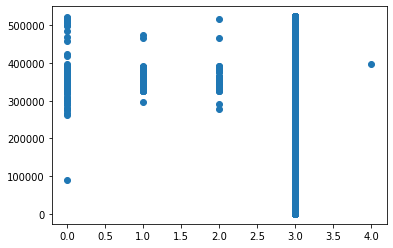

In [148]:
plt.scatter(x['employee_index'], np.arange(len(x)))

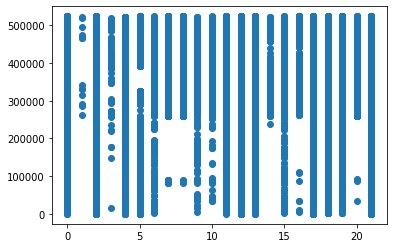

In [149]:
plt.scatter(y, np.arange(len(y)))

In [150]:
x = x.values

In [179]:
x_train = x[:int(len(x) * .7), :]
x_test = x[int(len(x) * .7):, :]

y_train = y[:int(len(y) * .7)]
y_test = y[int(len(y) * .7):]

In [180]:
x.shape

(523650, 17)

In [181]:
y.shape

(523650,)

In [182]:
x_train.shape

(366555, 17)

In [183]:
x_test.shape

(157095, 17)

In [184]:
y_train.shape

(366555,)

In [185]:
y_test.shape

(157095,)

# Random Forest v.0.0.1

In [199]:
def rfc_model(x_data, y_data, max_depth=6, max_features="auto", criterion='gini', max_leaf_nodes=None, random_state=0, 
              n_jobs=None, accuracy_feature_name=""):
  clf_model = RandomForestClassifier(max_depth=max_depth, max_features=max_features, 
                               criterion=criterion, max_leaf_nodes=max_leaf_nodes, 
                               random_state=random_state, n_jobs=n_jobs)
  clf_model.fit(x_data, y_data)
  y_pred = clf_model.predict(x_data)
  print("Accuracy:", accuracy_feature_name, '-->', accuracy_score(y_data, y_pred))
  print(accuracy_feature_name, '-->', classification_report(y_data, y_pred))

In [200]:
rfc_model(x, y, max_depth=7, random_state=8, criterion='entropy', accuracy_feature_name="Max Depth = " + str(7) + ", Random State = " + str(8))

Accuracy: Max Depth = 7, Random State = 8 --> 0.9100467869760336


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Depth = 7, Random State = 8 -->               precision    recall  f1-score   support

           0       1.00      0.97      0.98     12693
           1       0.00      0.00      0.00        15
           2       0.98      1.00      0.99    266512
           3       0.00      0.00      0.00        67
           4       0.95      0.50      0.65      5581
           5       0.99      1.00      1.00      6657
           6       0.97      0.51      0.67      3580
           7       0.89      1.00      0.94     54738
           8       0.96      0.76      0.85     11259
           9       1.00      0.78      0.88      1129
          10       0.00      0.00      0.00       408
          11       0.95      0.88      0.91     12487
          12       0.85      0.94      0.89     22621
          13       0.95      0.00      0.01      5640
          14       0.00      0.00      0.00       397
          15       0.00      0.00      0.00      2364
          16       1.00      0.02      0.04  

In [201]:
clf_model = RandomForestClassifier(max_depth=7, criterion='entropy')
clf_model.fit(x_train, y_train)
y_pred = clf_model.predict(x_test)

In [202]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8051879436010058
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6177
           1       0.00      0.00      0.00         8
           2       0.98      1.00      0.99     48354
           3       0.00      0.00      0.00        46
           4       0.86      0.08      0.15       741
           5       1.00      1.00      1.00      3767
           6       1.00      0.52      0.69       937
           7       0.65      1.00      0.79     23289
           8       0.99      0.39      0.56      9617
           9       0.98      0.56      0.71       159
          10       0.00      0.00      0.00       266
          11       0.91      0.33      0.49      6354
          12       0.88      0.78      0.82      7135
          13       1.00      0.00      0.01      2519
          14       0.00      0.00      0.00       203
          15       0.00      0.00      0.00       900
          16       0.00      0.00      0.00       98

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost Model Training v.0.0.1

In [ ]:
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.8
param['max_depth'] = 7
param['silent'] = 1
param['num_class'] = 22
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 12
param['subsample'] = 0.85
param['colsample_bytree'] = 0.9
param['seed'] = 1
num_rounds = 3
 
plst = list(param.items())
xgtrain = xgb.DMatrix(x, label=y)
model = xgb.train(plst, xgtrain, num_rounds)

# XGBoost Model Testing v.0.0.1

In [ ]:
xgtest = xgb.DMatrix(x)
preds = model.predict(xgtest)

In [ ]:
len(preds[0, :])

In [ ]:
preds.shape

In [ ]:
preds[0, :]

In [ ]:
sorted(preds[0, :], reverse=True)

In [ ]:
customer_code = customer_code_df.values

In [ ]:
len(customer_code)

In [ ]:
out_df = {}

for i in range(len(preds)):
  pred_products = dict()
  for j in range(len(products)):
    pred_products[products_label[j]] = preds[i, products[j]]
  # print(list({k: pred_products[k] for k in sorted(pred_products, key=pred_products.get, reverse=True)}.keys())[:8])
  out_df[customer_code[i]] = list({k: pred_products[k] for k in sorted(pred_products, key=pred_products.get, reverse=True)}.keys())[:8]

In [ ]:
out_df

# KNN v.0.0.1

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
knn_model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree', p=1)

In [192]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [155]:
y_preds = knn_model.predict(x_test)

In [156]:
print("Accuracy:", accuracy_score(y_test, y_preds))

Accuracy: 0.9897164136350616


#KNN Training

In [193]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [194]:
y_preds = knn_model.predict(x_train)

In [195]:
print("Accuracy:", accuracy_score(y_train, y_preds))

Accuracy: 0.9967753815934853


#KNN Testing

In [196]:
knn_model.fit(x_test, y_test)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [197]:
y_preds = knn_model.predict(x_test)

In [198]:
print("Accuracy:", accuracy_score(y_test, y_preds))

Accuracy: 0.9923231165855055
